In [ ]:
import torch

In [ ]:
from sklearn.datasets import fetch_openml

# descarga datos

mnist = fetch_openml('EMNIST_Balanced', version=1)
# mnist = fetch_openml('mnist_784', version=1
X, Y = mnist["data"], mnist["target"]

X.shape, Y.shape

/usr/local/lib/python3.8/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


((131600, 784), (131600,))

In [ ]:
print(Y)

0         45
1         36
2         43
3         15
4          4
          ..
131595    45
131596    15
131597     1
131598    26
131599    33
Name: class, Length: 131600, dtype: category
Categories (47, object): ['0', '1', '10', '11', ..., '6', '7', '8', '9']


In [ ]:
import numpy as np
X = X.to_numpy()
Y = Y.to_numpy()

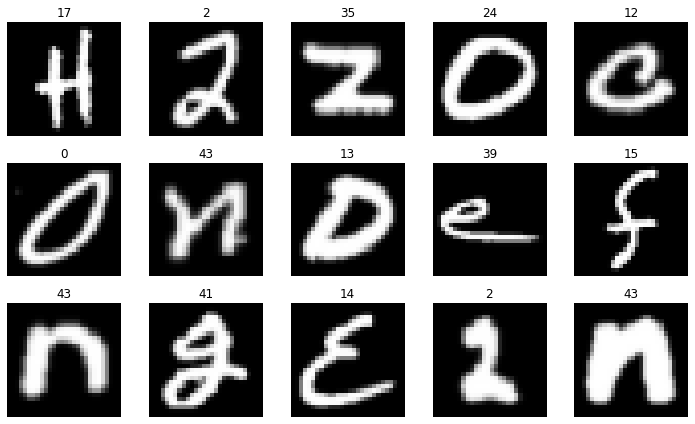

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import random

r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(X)-1)
        img = X[ix]
        img = img.reshape(28,28)
        img = np.fliplr(img)
        img = np.rot90(img)
        plt.imshow(img, cmap='gray')
        plt.axis("off")
        plt.title(Y[ix])
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

X = np.array(X)
Y = np.array(Y)
# normalización y split

X_train, X_test, y_train, y_test = X[:60000] / 255., X[60000:] / 255., Y[:60000].astype(np.int), Y[60000:].astype(np.int)

<ipython-input-8-9c136158efb2>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train, X_test, y_train, y_test = X[:60000] / 255., X[60000:] / 255., Y[:60000].astype(np.int), Y[60000:].astype(np.int)


In [ ]:
# función de pérdida y derivada

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

def cross_entropy(output, target):
    logits = output[torch.arange(len(output)), target]
    loss = - logits + torch.log(torch.sum(torch.exp(output), axis=-1))
    loss = loss.mean()
    return loss

In [ ]:
torch.cuda.is_available()

True

In [ ]:
D_in, H, D_out = 784, 400, 47

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

In [ ]:
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.8)

In [ ]:
outputs = model(torch.randn(64, 784))
outputs.shape

torch.Size([64, 47])

In [ ]:
model.to("cuda")

Sequential(
  (0): Linear(in_features=784, out_features=400, bias=True)
  (1): ReLU()
  (2): Linear(in_features=400, out_features=47, bias=True)
)

In [ ]:
from sklearn.metrics import accuracy_score

def evaluate(x):
    model.eval()
    y_pred = model(x)
    y_probas = softmax(y_pred)
    return torch.argmax(y_probas, axis=1)

y_pred = evaluate(torch.from_numpy(X_test).float().cuda())
accuracy_score(y_test, y_pred.cpu().numpy())

0.028966480446927373

In [ ]:
X_t = torch.from_numpy(X_train).float().cuda()
Y_t = torch.from_numpy(y_train).long().cuda()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.8)

epochs = 1100
log_each = 10
l = []
model.train()
for e in range(1, epochs+1): 
    
    # forward
    y_pred = model(X_t)

    # loss
    loss = criterion(y_pred, Y_t)
    l.append(loss.item())
    
    # ponemos a cero los gradientes
    optimizer.zero_grad()

    # Backprop (calculamos todos los gradientes automáticamente)
    loss.backward()

    # update de los pesos
    optimizer.step()
    
    if not e % log_each:
        print(f"Epoch {e}/{epochs} Loss {np.mean(l):.5f}")
        
y_pred = evaluate(torch.from_numpy(X_test).float().cuda())
accuracy_score(y_test, y_pred.cpu().numpy())

Epoch 10/1100 Loss 3.56690
Epoch 20/1100 Loss 3.05138
Epoch 30/1100 Loss 2.75119
Epoch 40/1100 Loss 2.51546
Epoch 50/1100 Loss 2.33188
Epoch 60/1100 Loss 2.19272
Epoch 70/1100 Loss 2.08312
Epoch 80/1100 Loss 1.98794
Epoch 90/1100 Loss 1.90704
Epoch 100/1100 Loss 1.83814
Epoch 110/1100 Loss 1.77937
Epoch 120/1100 Loss 1.72564
Epoch 130/1100 Loss 1.67708
Epoch 140/1100 Loss 1.63335
Epoch 150/1100 Loss 1.59332
Epoch 160/1100 Loss 1.55662
Epoch 170/1100 Loss 1.52281
Epoch 180/1100 Loss 1.49178
Epoch 190/1100 Loss 1.46255
Epoch 200/1100 Loss 1.43536
Epoch 210/1100 Loss 1.40982
Epoch 220/1100 Loss 1.38559
Epoch 230/1100 Loss 1.36265
Epoch 240/1100 Loss 1.34095
Epoch 250/1100 Loss 1.32037
Epoch 260/1100 Loss 1.30076
Epoch 270/1100 Loss 1.28229
Epoch 280/1100 Loss 1.26457
Epoch 290/1100 Loss 1.24750
Epoch 300/1100 Loss 1.23114
Epoch 310/1100 Loss 1.21548
Epoch 320/1100 Loss 1.20053
Epoch 330/1100 Loss 1.18621
Epoch 340/1100 Loss 1.17248
Epoch 350/1100 Loss 1.15945
Epoch 360/1100 Loss 1.14665
E

0.8234357541899441

<ipython-input-18-2f07d55f9aab>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  y_pred = evaluate(torch.tensor([img]).float().cuda())[0]


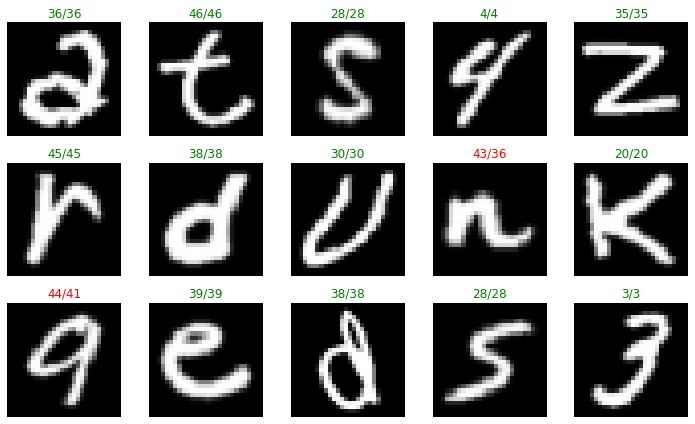

In [ ]:
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
test_imgs, test_labs = [], []
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(X_test)-1)
        img = X_test[ix]
        y_pred = evaluate(torch.tensor([img]).float().cuda())[0]
        img = img.reshape(28,28)
        img = np.fliplr(img)
        img = np.rot90(img)
        plt.imshow(img, cmap='gray')
        plt.axis("off")
        plt.title(f"{y_test[ix]}/{y_pred}", color="green" if y_test[ix] == y_pred else "red")
plt.tight_layout()
plt.show()